In [24]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None
pd.set_option('display.max_columns',60)
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
plt.rcParams['font.size']=24
from IPython.core.pylabtools import figsize


In [26]:
import seaborn as sns
sns.set(font_scale=2)
from sklearn.preprocessing import Imputer,MinMaxScaler


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
import lime
import lime.lime_tabular

In [28]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

In [29]:
imputer=Imputer(strategy='median')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
imputer.fit(train_features)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
X=imputer.transform(train_features)
X_test=imputer.transform(test_features)


In [32]:
X_test

array([[1.022000e+04, 5.729364e+06, 1.239100e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.289100e+04, 4.954012e+06, 2.663160e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [7.434000e+03, 3.533538e+06, 5.436500e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [4.033000e+03, 4.952360e+06, 9.301500e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.075000e+03, 4.407838e+06, 1.127000e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.859000e+03, 4.040464e+06, 1.671080e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [33]:
y=np.array(train_labels).reshape((-1,))
y_test=np.array(test_labels).reshape((-1,))

In [34]:
y_test

array([13., 55., 87., ..., 83., 51., 96.])

In [35]:
def mae(y_true,y_pred):
    return np.mean(abs(y_true=y_pred))



In [36]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
#  Make predictions on the test set
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

TypeError: abs() takes no keyword arguments

In [ ]:
print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

In [38]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Site EUI (kBtu/ft²),0.452163
1,Weather Normalized Site Electricity Intensity ...,0.249107
2,Water Intensity (All Water Sources) (gal/ft²),0.056662
3,Property Id,0.031396
4,Largest Property Use Type_Non-Refrigerated War...,0.025153
5,DOF Gross Floor Area,0.025003
6,log_Water Intensity (All Water Sources) (gal/ft²),0.022335
7,Largest Property Use Type_Multifamily Housing,0.021462
8,Order,0.020169
9,log_Direct GHG Emissions (Metric Tons CO2e),0.019410


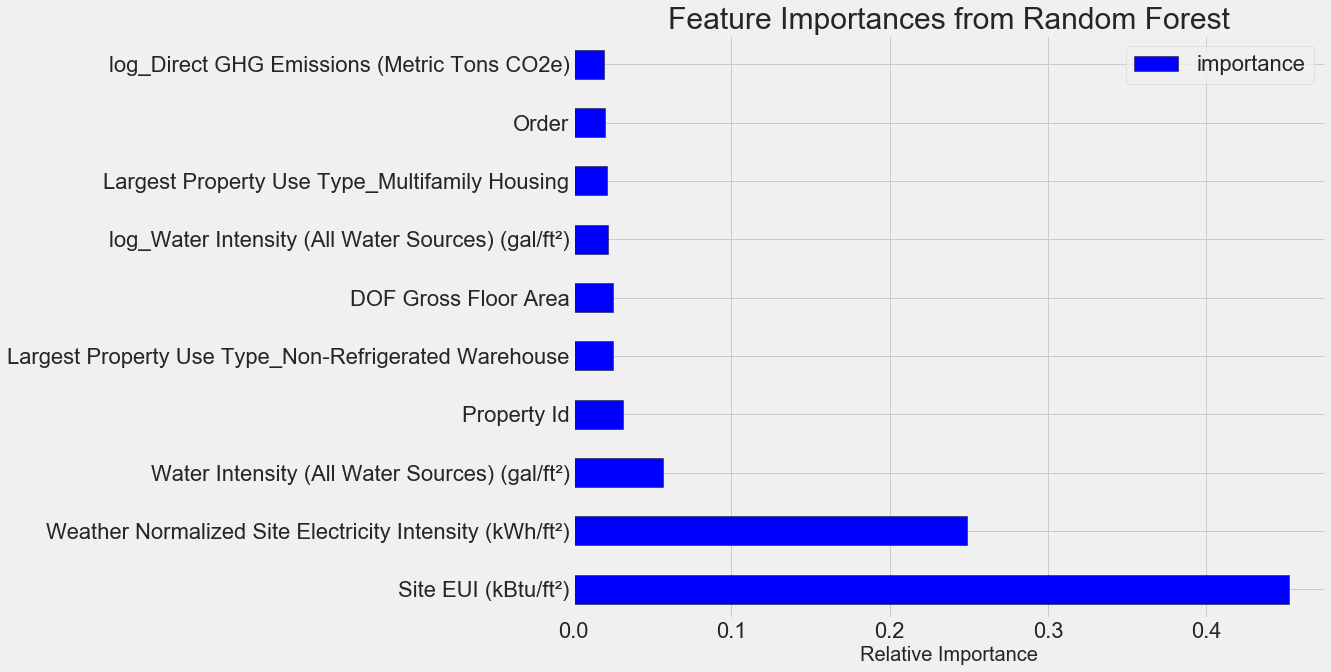

In [39]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [ ]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);